<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Le-prix-de-l'immobilier" data-toc-modified-id="Le-prix-de-l'immobilier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Le prix de l'immobilier</a></span><ul class="toc-item"><li><span><a href="#Régression-linéaire-simple" data-toc-modified-id="Régression-linéaire-simple-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Régression linéaire simple</a></span></li><li><span><a href="#Régression-linéaire-multiple" data-toc-modified-id="Régression-linéaire-multiple-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Régression linéaire multiple</a></span></li><li><span><a href="#Termes-d'interaction" data-toc-modified-id="Termes-d'interaction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Termes d'interaction</a></span></li><li><span><a href="#Transformations-non-linaires-des-prédicteurs" data-toc-modified-id="Transformations-non-linaires-des-prédicteurs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transformations non-linaires des prédicteurs</a></span></li></ul></li></ul></div>

# Le prix de l'immobilier

On s'intéresse dans cette partie au prix de l'immobilier à Boston. Ces données sont fournies dans R, et il suffit de les charger par `library(MASS)`. Vous pourrez ensuite obtenir la description de ce jeu de données par la commande `?Boston`. Chargez ces données, consultez l'aide. L'enjeu va être ici de prédire le prix de l'immobilier en fonction des paramètres disponibles. Pour cela, il va donc nous falloir construire un modèle le mieux adapté possible à cette tâche. Ce TP est issu du livre ISLR, page 109 et suivantes. 

In [1]:
library(MASS)

In [4]:
?Boston

## Régression linéaire simple

Vous débuterez par une régression linéaire simple de `medv` (le prix moyen) en fonction de la pauvreté de la population environnante. Vous utiliserez à nouveau la fonction `lm`. Afficher le résumé du modèle, et tracez les graphes de diagnostic. Que peut-on en déduire ?


In [15]:
model1=lm(medv~lstat, data=Boston)
summary(model1)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


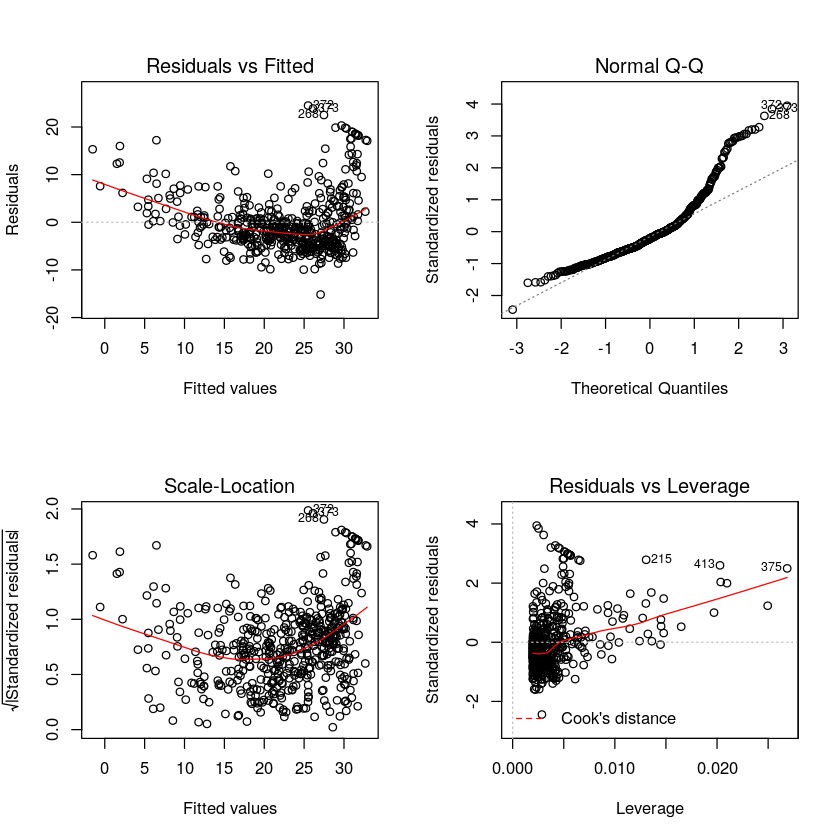

In [11]:
par(mfrow=c(2,2))
plot(model1)

Ces différents graphiques suggèrent une certaine non-linéarité dans la relation `medv~lstat`. Nous considèrerons cela plus attentivement dans la suite.  

Prédire les prix pour lstat valant 5, 10 puis 15, ainsi que les intervalles à 5% correspondants. D'abord avec l'intervalle de confiance, puis avec l'intervalle de prédiction. Une explication de la différence entre ces deux types d'intervalles [ici](http://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals).

In [13]:
confint(model1)

predict(model1,data.frame(lstat=(c(5,10,15))), interval="confidence")
predict(model1,data.frame(lstat=(c(5,10,15))), interval="prediction")

,2.5 %,97.5 %
(Intercept),33.44846,35.65922
lstat,-1.0261482,-0.8739505


,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.56567,42.04151
2,25.05335,12.82763,37.27907
3,20.303101,8.077742,32.528459


Finalement, tracez le nuage de point et la droite de régression. 

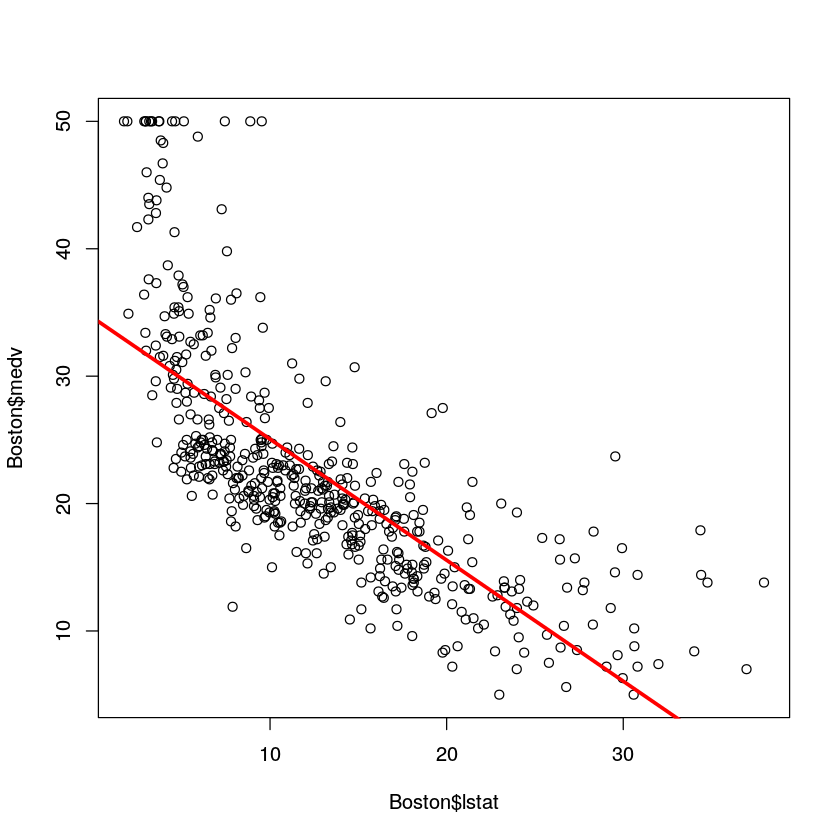

In [13]:
plot(Boston$lstat,Boston$medv)
abline(model1, lwd=3, col="red")

## Régression linéaire multiple

Effectuer une régression linéaire multiple de `medv` en fonction de `lstat` et `age`. Examiner quelles sont les $p$-values associées aux deux prédicteurs. Effectuer ensuite une régression sur l'ensemble des prédicteurs (utiliser le fait que `lm(y ~ .)`effectue la régression de y sur l'ensemble des variables). Que deviennent les $p$-values des deux prédicteurs précédents ? Quelles sont les variables qui paraissent pertinentes ?

In [15]:
model2 = lm(medv~lstat+age, data=Boston)
summary(model2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [17]:
model3 = lm(medv~., data=Boston)
summary(model3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

On constate que lorsqu'on inclue l'ensemble des variables, `age`, qui était significatif ne l'est-plus. 

Examiner le VIF des différents prédicteurs. Vous devrez utiliser pour cela la librairie `car`. Si celle-ci n'est pas présente, vous pouvez l'installer par `install.packages('car')`. Si vous manquez un peu de temps, vous pouvez aussi passer à la question suivante. 

In [27]:
library('car')
vif(model3)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

Il ne semble pas qu'il y ait de franche colinéarité. 

On peut donc supposer que les variables `age` et  `indus` sont inutiles. Effectuer une régression linéaire en supprimant d'abord `age`, puis  `age` et  `indus`. Surveillez les valeurs de R-squared et de Adjusted R-Squared. Utiliser le fait que `lm(y~ .-x)` effectue la régression sur `.` sauf `x`). 

In [19]:
model4 = lm(medv~.-age, data=Boston)
summary(model4)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

In [29]:
model5 = lm(medv~.-age-indus, data=Boston)
summary(model5)


Call:
lm(formula = medv ~ . - age - indus, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 494 d

Toutes les variables sont maintenant significatives, le R2 n'a pas bougé et le Adjusted R2 a légèrement augmenté. On peut sans crainte supprimer ces deux variables. 

## Termes d'interaction

Puisqu'on soupçonne qu'il y ait une non-linéarité dans le modèle (à partir de l'examen des résidus), commençons par tester si des termes d'interaction peuvent approrter quelque chose. La syntaxe `lstat:black` permet d'inclure un terme d'interaction entre
lstat et black. La syntaxe `lstat*age` inclue simultanément `lstat`, `age`,
et `lstat:age`. Examinez que deviennent les résultats en incluant un terme d'interaction en `lstat` et `age`, puis entre `crim` et `dist`. Ces approches, ou l'une d'entre elles, apportent-elles quelque chose ?

In [21]:
 summary (lm(medv~.-age-indus+lstat:age ,data=Boston))


Call:
lm(formula = medv ~ . - age - indus + lstat:age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4359  -2.7321  -0.5076   1.7869  26.0602 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.735e+01  5.340e+00   6.995 8.66e-12 ***
crim        -1.104e-01  3.296e-02  -3.349 0.000874 ***
zn           4.486e-02  1.363e-02   3.291 0.001069 ** 
chas         2.710e+00  8.549e-01   3.170 0.001617 ** 
nox         -1.797e+01  3.669e+00  -4.896 1.33e-06 ***
rm           3.738e+00  4.198e-01   8.904  < 2e-16 ***
dis         -1.467e+00  1.907e-01  -7.690 8.06e-14 ***
rad          3.029e-01  6.368e-02   4.757 2.59e-06 ***
tax         -1.185e-02  3.377e-03  -3.510 0.000490 ***
ptratio     -9.541e-01  1.298e-01  -7.353 8.12e-13 ***
black        9.153e-03  2.685e-03   3.408 0.000707 ***
lstat       -5.880e-01  1.181e-01  -4.979 8.85e-07 ***
age:lstat    6.554e-04  1.083e-03   0.605 0.545385    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

In [23]:
 summary (lm(medv~.-age-indus+dis:crim ,data=Boston))


Call:
lm(formula = medv ~ . - age - indus + dis:crim, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4982  -2.6794  -0.4866   1.9076  25.1605 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.231515   5.039225   6.991 8.89e-12 ***
crim          0.287063   0.134353   2.137 0.033120 *  
zn            0.039806   0.013559   2.936 0.003482 ** 
chas          2.581366   0.848443   3.042 0.002472 ** 
nox         -16.786101   3.511638  -4.780 2.32e-06 ***
rm            3.908503   0.404522   9.662  < 2e-16 ***
dis          -1.384764   0.187613  -7.381 6.73e-13 ***
rad           0.341938   0.064412   5.309 1.67e-07 ***
tax          -0.011412   0.003347  -3.410 0.000704 ***
ptratio      -0.924797   0.128207  -7.213 2.07e-12 ***
black         0.007393   0.002725   2.713 0.006899 ** 
lstat        -0.528552   0.047077 -11.227  < 2e-16 ***
crim:dis     -0.270333   0.089110  -3.034 0.002543 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

Il est possible de générer automatiquement des termes d'interaction par la syntaxe `(a+b+c)^2` qui va générer les termes d'interaction `a:b`, `a:c`, et `b:c`. Appliquer cette technique pour faire la régression sur l'ensemble des variables, sauf `age`  et `indus` et en ajoutant les interaction entre `dis`, `crim`, `chas`, et `tax`.  Comment évoluent les performances du modèle ? Quelles sont les variables à retenir ?

In [33]:
summary (lm(medv~.-age-indus+(dis+crim+chas+tax)^2 ,data=Boston))


Call:
lm(formula = medv ~ . - age - indus + (dis + crim + chas + tax)^2, 
    data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2602  -2.5941  -0.5007   2.0032  24.7683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.931596   5.077312   6.683 6.41e-11 ***
crim          3.587743   1.282817   2.797  0.00537 ** 
zn            0.038184   0.013322   2.866  0.00433 ** 
chas          3.538245   6.189971   0.572  0.56785    
nox         -23.963459   3.964120  -6.045 2.97e-09 ***
rm            4.025802   0.394199  10.213  < 2e-16 ***
dis          -0.489870   0.480441  -1.020  0.30841    
rad           0.338367   0.070169   4.822 1.90e-06 ***
tax          -0.001173   0.005734  -0.205  0.83791    
ptratio      -0.923108   0.129627  -7.121 3.85e-12 ***
black         0.008395   0.002670   3.144  0.00177 ** 
lstat        -0.519539   0.046898 -11.078  < 2e-16 ***
crim:dis     -0.194671   0.096156  -2.025  0.04346 *  
chas:dis      0.7

Le Adjusted-R2 augmente, ce qui signifie que l'on ajoute de l'information utile. En outre, un certain nombre de $p$-values des variabes ajoutées sont très faibles (marquées par des  `*`), et on pourra retenir ces prédicteurs. 

Enfin, on peut aussi considérer l'ensemble des interactions possibles en effectuant un régression avec un terme `(.)^2`. Comment évoluent alors les R2 ? Quelles sont les variables à retenir ?

In [25]:
 summary (lm(medv~.-age-indus+(.)^2 ,data=Boston))


Call:
lm(formula = medv ~ . - age - indus + (.)^2, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9374 -1.5344 -0.1068  1.2973 17.8500 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.579e+02  6.800e+01  -2.323 0.020683 *  
crim          -1.707e+01  6.554e+00  -2.605 0.009526 ** 
zn            -7.529e-02  4.580e-01  -0.164 0.869508    
chas           4.451e+01  1.952e+01   2.280 0.023123 *  
nox            2.006e+01  7.516e+01   0.267 0.789717    
rm             2.527e+01  5.699e+00   4.435 1.18e-05 ***
dis           -1.698e+00  4.604e+00  -0.369 0.712395    
rad            1.861e+00  2.464e+00   0.755 0.450532    
tax            3.670e-02  1.440e-01   0.255 0.798978    
ptratio        2.725e+00  2.850e+00   0.956 0.339567    
black          9.942e-02  7.468e-02   1.331 0.183833    
lstat          1.656e+00  8.533e-01   1.940 0.053032 .  
indus         -2.819e+00  1.696e+00  -1.663 0.097111 .  
age            1.263e+00  

## Transformations non-linaires des prédicteurs


Il est possible d'effectuer n'importe quelle transformation de chacun des prédicteurs. Etant donné un prédicteur $X$, on peut créer un nouveau prédicteur  $X^2$ en utilisant la fonction I(X^2). On doit utiliser I() car ^ est là pour les termes d'interaction... Utiliser ceci pour faire une régression de medv sur lstat et lstat^2. Comparer aux résultats sans le terme quadratique. 

In [27]:
summary(lm(medv~lstat, data=Boston))


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [36]:
summary(lm(medv~lstat+I(lstat^2), data=Boston))


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


On peut générer les prédicteurs correspondants aux différents termes d'un polynôme via la fonction `poly(x,n)`. Utiliser cette fonction pour effectuer une régression de `medv` vis-à-vis de `lstat` au degré 7. Quels paraissent être les coefficients importants ?

In [37]:
summary(lm(medv~poly(lstat,7), data=Boston))


Call:
lm(formula = medv ~ poly(lstat, 7), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3746  -3.1382  -0.7072   2.0646  26.9642 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2319  97.168  < 2e-16 ***
poly(lstat, 7)1 -152.4595     5.2164 -29.227  < 2e-16 ***
poly(lstat, 7)2   64.2272     5.2164  12.313  < 2e-16 ***
poly(lstat, 7)3  -27.0511     5.2164  -5.186 3.13e-07 ***
poly(lstat, 7)4   25.4517     5.2164   4.879 1.44e-06 ***
poly(lstat, 7)5  -19.2524     5.2164  -3.691 0.000248 ***
poly(lstat, 7)6    6.5088     5.2164   1.248 0.212708    
poly(lstat, 7)7    1.9416     5.2164   0.372 0.709888    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.216 on 498 degrees of freedom
Multiple R-squared:  0.6828,	Adjusted R-squared:  0.6783 
F-statistic: 153.1 on 7 and 498 DF,  p-value: < 2.2e-16


Pour ajouter à la fois des termes polynomiaux et des termes d'interaction, vous pouvez utiliser la fonction polym, dont la syntaxe n'est évidemment pas semblable à celle de poly : polym(variable1, variable2, ...,  degree=n). Effectuer par exemple une régression sur l'ensemble des variables, plus les carrés de `lstat` et `crim`, et le terme d'interaction. Quelles sont les variables à retenir ?

In [38]:
summary(lm(medv~.+polym(lstat, crim, degree=2), data=Boston))


Call:
lm(formula = medv ~ . + polym(lstat, crim, degree = 2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4346  -2.5194  -0.3633   1.8436  23.8521 

Coefficients: (2 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.769e+01  4.567e+00   8.253 1.45e-15 ***
crim                              -8.652e-02  5.369e-02  -1.611  0.10772    
zn                                 2.486e-02  1.246e-02   1.996  0.04653 *  
indus                              2.194e-02  5.541e-02   0.396  0.69224    
chas                               2.263e+00  7.709e-01   2.936  0.00348 ** 
nox                               -1.622e+01  3.413e+00  -4.753 2.64e-06 ***
rm                                 2.918e+00  3.831e-01   7.617 1.35e-13 ***
age                                2.732e-02  1.212e-02   2.254  0.02463 *  
dis                               -1.220e+00  1.807e-01  -6.749 4.22e